In [2]:
import itertools
n = 4
lst = list(itertools.product([0, 1], repeat=n))

print lst

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)]


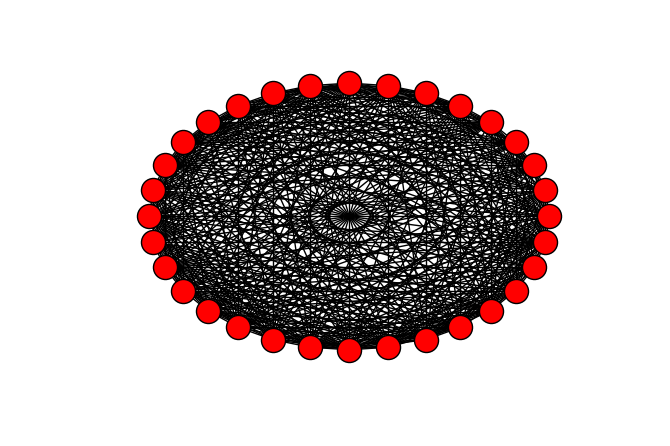

[(1, 1, 0, 1, 0), (1, 0, 0, 0, 0), (1, 0, 1, 1, 0), (1, 0, 0, 1, 1), (0, 0, 0, 1, 0), (1, 1, 1, 0, 0), (1, 1, 0, 0, 1), (0, 1, 0, 0, 0), (0, 1, 0, 1, 1), (0, 1, 1, 1, 0), (1, 1, 1, 1, 1), (0, 1, 1, 0, 1), (1, 0, 1, 0, 1), (0, 0, 0, 0, 1), (0, 0, 1, 1, 1), (0, 0, 1, 0, 0)]
Tamaño del clique máximo:  16


In [2]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

def distancia(x , y):
    cont = 0;
    for a in range(len( x )):
        if(x[a] <> y[a]):
            cont = cont + 1;
    return cont;


def hamming(n , d):
    G=nx.Graph()
    lst = list(itertools.product([0, 1], repeat=n))
    for i in range(len(lst)):
        G.add_node(lst[i])
    for i in range(len(lst)):
        for j in range (len(lst)):
            if i <> j:
                if( distancia(lst[i], lst[j]) >= d):
                    G.add_edge(lst[i], lst[j]);
                    
    lista = list(nx.find_cliques(G)) 
    maximo = 0;
    nodosmax = [];
    nx.draw_circular(G)
    plt.show()
    for i in lista:
        if(len(i) > maximo):
            maximo = len(i);
            nodosmax= i;
    return nodosmax , maximo;
    

nodos, maximo = hamming(5,2) 

print nodos;
print "Tamaño del clique máximo: " ,maximo;


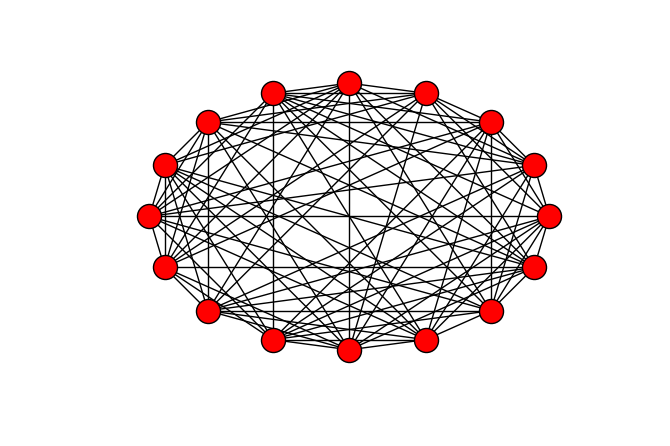

[(1, 0, 1, 1), (1, 1, 0, 1), (1, 0, 0, 0), (0, 0, 0, 1), (0, 1, 1, 1), (1, 1, 1, 0), (0, 0, 1, 0), (0, 1, 0, 0)]
Tamaño del clique máximo:  8


In [3]:
nodos, maximo = hamming(4,2) 

print nodos;
print "Tamaño del clique máximo: " ,maximo;

# Análisis de Complejidad

1) Se varía tanto n, como d, para cada n, se hallan todos los cliques máximos para desde 1 hasta d

In [14]:
import time
import pylab as pl
%matplotlib inline


def aleatorio(n):
    results = []
    for i in range(2,n):
        for j in range(i,1,-1):         
            tic = time.clock()
            hamming(i,j)
            toc = time.clock()
            results.append((toc-tic)*100)
    return results;

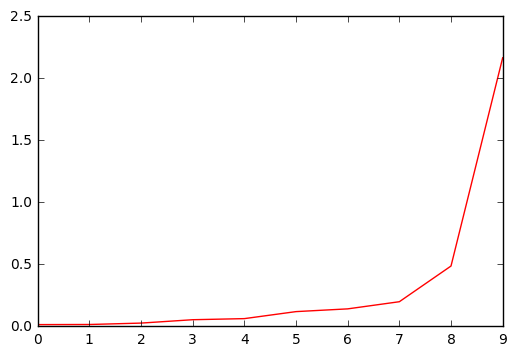

In [19]:
import numpy as np

resultados = aleatorio(6);
x = np.arange(len(resultados))
y = np.array(resultados)
pl.plot(x, y,color='red')  

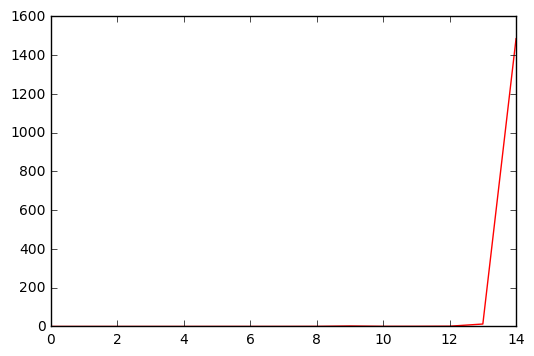

In [18]:
import numpy as np

resultados = aleatorio(7);
x = np.arange(len(resultados))
y = np.array(resultados)
pl.plot(x, y,color='red')  

2) Se varía el n y d, para cada n, se halla el cliqué máximo para distancias n-1 y n-2

In [26]:
import time
import pylab as pl
%matplotlib inline


def aleatorio2(n):
    results = []
    for i in range(2,n):
        for j in range(i,i-2,-1):         
            tic = time.clock()
            hamming(i,j)
            toc = time.clock()
            results.append((toc-tic)*100)
    return results;

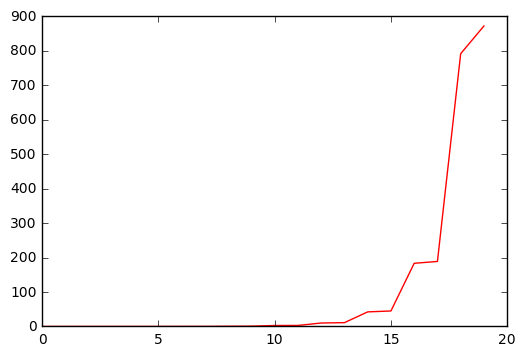

In [32]:
import numpy as np

resultados = aleatorio2(12);
x = np.arange(len(resultados))
y = np.array(resultados)
pl.plot(x, y,color='red')  